In [80]:
import numpy as np
import pandas as pd
import nltk
from pycorenlp import StanfordCoreNLP
import re
import codecs
import requests
import PyLyrics
import progressbar

In [40]:
nlp = StanfordCoreNLP('http://localhost:9000')

In [39]:
lyrics = PyLyrics.PyLyrics.getLyrics('Army Of The Pharaohs',' Cry')
lyrics = re.sub('[^a-zA-Z0-9\n\'\[\]]', ' ', lyrics).lower()

/Users/Bart/anaconda/lib/python3.5/site-packages/bs4/__init__.py:181: UserWarning: No parser was explicitly specified, so I'm using the best available HTML parser for this system ("lxml"). This usually isn't a problem, but if you run this code on another system, or in a different virtual environment, it may use a different parser and behave differently.

The code that caused this warning is on line 184 of the file /Users/Bart/anaconda/lib/python3.5/runpy.py. To get rid of this warning, change code that looks like this:

 BeautifulSoup([your markup])

to this:

 BeautifulSoup([your markup], "lxml")

  markup_type=markup_type))


In [41]:
lines = [l for l in lyrics.split('\n') if (len(l) > 0 and l[0] != '[')]

In [42]:
tokens = []
for line in lines:
    output = nlp.annotate(line, properties={
            'annotators': 'tokenize, ssplit', \
            'outputFormat': 'json' \
        })
    tokens.append([t['word'] for s in output['sentences'] for t in s['tokens']])

In [45]:
tokens

[['hahahaha'],
 ['yeah', 'muthafuckas', 'we', "'re", 'back'],
 ['pharaoh', 'clique', 'muthafucka', 'yeah'],
 ['des', 'devious', 'king', 'syze'],
 ['apathy', 'celph', 'titled', 'kamachi'],
 ['vinnie', 'p', 'outerspace'],
 ['7l', 'es'],
 ['i',
  'put',
  'you',
  'up',
  'on',
  'the',
  'iv',
  'not',
  'the',
  'roman',
  'numeral',
  '4'],
 ['but', 'the', 'iv', 'that', 'leads', 'to', 'the', 'funeral', 'floor'],
 ['wax', 'gets', 'melted', 'breaks', 'bones', 'fractures', 'pelvics'],
 ['speeds',
  'through',
  'space',
  'and',
  'cracks',
  'blast',
  'astronaut',
  'helmets'],
 ['face',
  'it',
  'muthafucka',
  'i',
  'could',
  'pay',
  'to',
  'get',
  'rid',
  'of',
  'you'],
 ['i',
  'got',
  'more',
  'heads',
  'in',
  'the',
  'hood',
  'than',
  'pagan',
  'rituals'],
 ['a', 'new', 'tyrannical', 'force', 'for', 'you', 'to', 'fear'],
 ['known', 'to', 'kill', 'and', 'keep', 'human', 'ears', 'as', 'souvenirs'],
 ['a', 'shape', 'shifter', 'face', 'slitter', 'paper', 'getter'],
 ['

In [46]:
arpabet = nltk.corpus.cmudict.dict()

base_url = 'http://www.speech.cs.cmu.edu/cgi-bin/tools/logios/lextool.pl'

file = {'wordfile': ('words.txt', "\n".join([str(t).upper() for line in tokens for t in line if t not in arpabet.keys()]))}

res = requests.post(base_url, files=file, allow_redirects=True)

dict_re = re.compile(r"(?<=DICT ).*?\.dict")

dict_url = dict_re.search(res.text).group(0)

res_dict = requests.get(dict_url)

In [48]:
custom_dict = {line.split('\t')[0].lower(): line.split('\t')[1].split(' ') for line in res_dict.text.split('\n') if len(line) > 1}

In [49]:
def get_phonemes(word):
    try:
        return arpabet[word][0]
    except:
        try:
            return custom_dict[word]
        except:
            print(word)
            return word

phonemes = [[get_phonemes(t) for t in line] for line in tokens]

In [50]:
phonemes

[[['HH', 'AH', 'HH', 'AE', 'HH', 'AH', 'HH', 'AH']],
 [['Y', 'AE1'],
  ['M', 'AH', 'TH', 'AH', 'F', 'AH', 'K', 'AH', 'Z'],
  ['W', 'IY1'],
  ['R'],
  ['B', 'AE1', 'K']],
 [['F', 'EH1', 'R', 'OW0'],
  ['K', 'L', 'IY1', 'K'],
  ['M', 'AH', 'TH', 'AH', 'F', 'AH', 'K', 'AH'],
  ['Y', 'AE1']],
 [['D', 'EH1'],
  ['D', 'IY1', 'V', 'IY0', 'AH0', 'S'],
  ['K', 'IH1', 'NG'],
  ['S', 'AY', 'Z']],
 [['AE1', 'P', 'AH0', 'TH', 'IY0'],
  ['S', 'EH', 'L', 'F'],
  ['T', 'AY1', 'T', 'AH0', 'L', 'D'],
  ['K', 'AE', 'M', 'AH', 'CH', 'IY']],
 [['V', 'IH1', 'N', 'IY0'],
  ['P', 'IY1'],
  ['AW', 'T', 'ER', 'S', 'P', 'EY', 'S']],
 [['S', 'EH', 'V', 'AH', 'N', 'EH', 'L'], ['EH1', 'S']],
 [['AY1'],
  ['P', 'UH1', 'T'],
  ['Y', 'UW1'],
  ['AH1', 'P'],
  ['AA1', 'N'],
  ['DH', 'AH0'],
  ['IH', 'V'],
  ['N', 'AA1', 'T'],
  ['DH', 'AH0'],
  ['R', 'OW1', 'M', 'AH0', 'N'],
  ['N', 'UW1', 'M', 'ER0', 'AH0', 'L'],
  ['F', 'OW', 'R']],
 [['B', 'AH1', 'T'],
  ['DH', 'AH0'],
  ['IH', 'V'],
  ['DH', 'AE1', 'T'],
  ['L', 'I

In [70]:
df = pd.DataFrame(pd.Series([p for line in phonemes for word in line for p in word]).value_counts()).transpose()

In [76]:
df = df.append(df[['N','AA']], ignore_index=True)

In [77]:
df

,,AA,AA0,AA1,AA2,AE,AE1,AH,AH0,AH1,...,UH1,UW,UW0,UW1,UW2,V,W,Y,Z,ZH
0,37.0,7,2.0,63.0,3.0,8.0,86.0,53.0,244.0,66.0,...,14.0,1.0,5.0,78.0,1.0,69.0,68.0,75.0,105.0,1.0
1,NaN,7,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,NaN,7,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,NaN,7,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,NaN,7,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
5,NaN,7,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
6,NaN,7,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
7,NaN,7,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [79]:
pd.DataFrame().append(df)

,,AA,AA0,AA1,AA2,AE,AE1,AH,AH0,AH1,...,UH1,UW,UW0,UW1,UW2,V,W,Y,Z,ZH
0,37.0,7,2.0,63.0,3.0,8.0,86.0,53.0,244.0,66.0,...,14.0,1.0,5.0,78.0,1.0,69.0,68.0,75.0,105.0,1.0
1,NaN,7,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,NaN,7,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,NaN,7,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,NaN,7,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
5,NaN,7,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
6,NaN,7,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
7,NaN,7,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [32]:
songs = [('Taylor Swift', 'Blank Space', 'Pop'), \
         ('Justin Bieber', 'Sorry', 'Pop'), \
         ('Sia', 'Cheap Thrills', 'Pop'), \
         ('Mark Ronson', 'Uptown Funk', 'Pop'), \
         ('Darius Rucker', 'Wagon Wheel', 'Country'), \
         ('William Michael Morgan', 'I Met A Girl', 'Country'), \
         ('Cole Swindell', 'Middle Of A Memory', 'Country'), \
         ('Jon Pardi', 'Head Over Boots', 'Country'), \
         ('AC/DC', 'Back in Black', 'Rock'), \
         ('Led Zeppelin', 'Stairway to Heaven', 'Rock'), \
         ('Lynyrd Skynyrd', 'Free Bird', 'Rock'), \
         ('The Rolling Stones', 'Goin\' Home', 'Rock'), \
         ('Army Of The Pharaohs','Battle Cry', 'Rap'), \
         ('The Notorious B.I.G.', 'Juicy', 'Rap'), \
         ('Drake', 'Hotline Bling', 'Rap'), \
         ('Eminem', 'Bad Guy', 'Rap') \
        ]

arpabet = nltk.corpus.cmudict.dict()
base_url = 'http://www.speech.cs.cmu.edu/cgi-bin/tools/logios/lextool.pl'
dict_re = re.compile(r"(?<=DICT ).*?\.dict")

In [81]:
df = pd.DataFrame()

bar = progressbar.ProgressBar()

for artist, song, genre in bar(songs):
    lyrics = PyLyrics.PyLyrics.getLyrics(artist, song)
    lyrics = re.sub('[^a-zA-Z0-9\n\'\[\]]', ' ', lyrics).lower()
    
    lines = [l for l in lyrics.split('\n') if (len(l) > 0 and l[0] != '[')]
    
    tokens = []
    for line in lines:
        output = nlp.annotate(line, properties={
                'annotators': 'tokenize, ssplit', \
                'outputFormat': 'json' \
            })
        tokens.append([t['word'] for s in output['sentences'] for t in s['tokens']])
        
    file = {'wordfile': ('words.txt', "\n".join([str(t).upper() for line in tokens for t in line if t not in arpabet.keys()]))}
    res = requests.post(base_url, files=file, allow_redirects=True)
    dict_url = dict_re.search(res.text).group(0)
    res_dict = requests.get(dict_url)
    custom_dict = {line.split('\t')[0].lower(): line.split('\t')[1].split(' ') for line in res_dict.text.split('\n') if len(line) > 1}
    
    phonemes = [[get_phonemes(t) for t in line] for line in tokens]
    
    new_line = pd.DataFrame(pd.Series([p for line in phonemes for word in line for p in word]).value_counts()).transpose()
    new_line['artist'] = artist
    new_line['song'] = song
    new_line['genre'] = genre
    
    df = df.append(new_line, ignore_index=True)

  0% ( 0 of 16) |                                                                                                                        | Elapsed Time: 0:00:00 ETA:  --:--:--/Users/Bart/anaconda/lib/python3.5/site-packages/bs4/__init__.py:181: UserWarning: No parser was explicitly specified, so I'm using the best available HTML parser for this system ("lxml"). This usually isn't a problem, but if you run this code on another system, or in a different virtual environment, it may use a different parser and behave differently.

The code that caused this warning is on line 184 of the file /Users/Bart/anaconda/lib/python3.5/runpy.py. To get rid of this warning, change code that looks like this:

 BeautifulSoup([your markup])

to this:

 BeautifulSoup([your markup], "lxml")

  markup_type=markup_type))
100% (16 of 16) |#########################################################################################################################| Elapsed Time: 0:00:51 Time: 0:00:51


In [87]:
df = df.fillna(0)

In [90]:
df.columns

Index(['', 'AA', 'AA0', 'AA1', 'AA2', 'AE', 'AE0', 'AE1', 'AE2', 'AH', 'AH0',
       'AH1', 'AH2', 'AO', 'AO0', 'AO1', 'AO2', 'AW', 'AW1', 'AW2', 'AY',
       'AY0', 'AY1', 'AY2', 'B', 'CH', 'D', 'DH', 'EH', 'EH0', 'EH1', 'EH2',
       'ER', 'ER0', 'ER1', 'ER2', 'EY', 'EY0', 'EY1', 'EY2', 'F', 'G', 'HH',
       'IH', 'IH0', 'IH1', 'IH2', 'IY', 'IY0', 'IY1', 'IY2', 'JH', 'K', 'L',
       'M', 'N', 'NG', 'OW', 'OW0', 'OW1', 'OW2', 'OY1', 'P', 'R', 'S', 'SH',
       'T', 'TH', 'UH', 'UH1', 'UH2', 'UW', 'UW0', 'UW1', 'UW2', 'V', 'W', 'Y',
       'Z', 'ZH', 'artist', 'genre', 'song'],
      dtype='object')

In [91]:
df

,,AA,AA0,AA1,AA2,AE,AE0,AE1,AE2,AH,...,UW1,UW2,V,W,Y,Z,ZH,artist,genre,song
0,0.0,6.0,0.0,36,0.0,0.0,0.0,23,0.0,0.0,...,44,0.0,33,38,42,41,0.0,Taylor Swift,Pop,Blank Space
1,0.0,0.0,0.0,32,0.0,0.0,0.0,28,0.0,0.0,...,44,0.0,5,13,28,22,0.0,Justin Bieber,Pop,Sorry
2,0.0,0.0,0.0,50,0.0,0.0,0.0,40,0.0,0.0,...,23,0.0,18,4,2,36,0.0,Sia,Pop,Cheap Thrills
3,14.0,7.0,0.0,71,0.0,0.0,0.0,30,6.0,4.0,...,90,0.0,26,49,52,15,0.0,Mark Ronson,Pop,Uptown Funk
4,2.0,1.0,0.0,44,0.0,0.0,0.0,15,0.0,0.0,...,13,0.0,8,20,3,6,0.0,Darius Rucker,Country,Wagon Wheel
5,2.0,0.0,0.0,5,1.0,2.0,0.0,8,0.0,2.0,...,17,0.0,9,23,1,24,0.0,William Michael Morgan,Country,I Met A Girl
6,1.0,4.0,3.0,14,0.0,0.0,0.0,18,0.0,12.0,...,33,0.0,39,31,20,8,0.0,Cole Swindell,Country,Middle Of A Memory
7,0.0,0.0,0.0,27,0.0,0.0,0.0,8,0.0,0.0,...,45,0.0,7,35,39,8,0.0,Jon Pardi,Country,Head Over Boots
8,5.0,1.0,0.0,6,1.0,0.0,0.0,76,1.0,3.0,...,8,0.0,9,18,20,7,0.0,AC/DC,Rock,Back in Black
9,0.0,0.0,0.0,14,0.0,0.0,0.0,17,0.0,1.0,...,48,0.0,13,43,14,25,0.0,Led Zeppelin,Rock,Stairway to Heaven


In [121]:
voiced_sounds = ['AA', 'AE', 'AH', 'AO', 'AW', 'AX', 'AXR', 'AY', 'EH', 'EL', 'EM', 'EN', 'ER', 'EY', 'IH', 'IX', 'IY', 'L', 'M', 'N', 'NX', 'OW', 'OY', 'UH', 'UW', 'W', 'Y', 'Z', 'R']
voiced_fricatives = ['DH', 'JH' , 'V' , 'WH' , 'ZH']
unvoiced_fricatives = ['F', 'S', 'HH', 'TH', 'SH', 'CH']
voiced_stop_consonants = ['B', 'D', 'H', 'DX']
unvoiced_stop_consonants = ['K', 'P', 'T']

In [105]:
phonemes_df = pd.DataFrame({'phoneme': df.columns[:-3]})

In [122]:
phonemes_df['voiced_sounds'] = phonemes_df['phoneme'].apply(lambda x: int(''.join(filter(lambda x: x.isalpha(), x)) in voiced_sounds))
phonemes_df['voiced_fricatives'] = phonemes_df['phoneme'].apply(lambda x: int(''.join(filter(lambda x: x.isalpha(), x)) in voiced_fricatives))
phonemes_df['unvoiced_fricatives'] = phonemes_df['phoneme'].apply(lambda x: int(''.join(filter(lambda x: x.isalpha(), x)) in unvoiced_fricatives))
phonemes_df['voiced_stop_consonants'] = phonemes_df['phoneme'].apply(lambda x: int(''.join(filter(lambda x: x.isalpha(), x)) in voiced_stop_consonants))
phonemes_df['unvoiced_stop_consonants'] = phonemes_df['phoneme'].apply(lambda x: int(''.join(filter(lambda x: x.isalpha(), x)) in unvoiced_stop_consonants))

In [135]:
categories = ['voiced_sounds', 'voiced_fricatives', 'unvoiced_fricatives', 'voiced_stop_consonants', 'unvoiced_stop_consonants']
for cat in categories:
    df[cat] = np.sum(df[phonemes_df.phoneme[phonemes_df[cat] == 1]], axis=1) 
    
df['total_cat'] = np.sum(df[categories], axis=1) 

for cat in categories:
    df[cat] /= df['total_cat']

In [139]:
sub_df = df.iloc[:, 80:]

In [140]:
sub_df

,artist,genre,song,voiced_sounds,voiced_fricatives,unvoiced_fricatives,voiced_stop_consonants,unvoiced_stop_consonants,total
0,Taylor Swift,Pop,Blank Space,0.702073,0.044041,0.086140,0.054404,0.113342,1544.0
1,Justin Bieber,Pop,Sorry,0.713661,0.036066,0.079781,0.041530,0.128962,915.0
2,Sia,Pop,Cheap Thrills,0.692929,0.028283,0.071717,0.087879,0.119192,990.0
3,Mark Ronson,Pop,Uptown Funk,0.640468,0.040691,0.104794,0.045151,0.168896,1794.0
4,Darius Rucker,Country,Wagon Wheel,0.723214,0.030134,0.069196,0.063616,0.113839,896.0
5,William Michael Morgan,Country,I Met A Girl,0.637097,0.036866,0.127880,0.077189,0.120968,868.0
6,Cole Swindell,Country,Middle Of A Memory,0.710018,0.068541,0.044815,0.078207,0.098418,1138.0
7,Jon Pardi,Country,Head Over Boots,0.722861,0.033206,0.074074,0.071520,0.098340,783.0
8,AC/DC,Rock,Back in Black,0.672922,0.033512,0.052279,0.096515,0.144772,746.0
9,Led Zeppelin,Rock,Stairway to Heaven,0.685274,0.050048,0.104909,0.062560,0.097209,1039.0


In [141]:
from sklearn.decomposition import PCA

In [155]:
pca = PCA(whiten=True)
pcs = pca.fit_transform(sub_df.iloc[:,3:])

In [156]:
import matplotlib.pyplot as plt

In [157]:
genre_encoding = {
    'Pop': 0, \
    'Rap': 1, \
    'Rock': 2, \
    'Country': 3
}

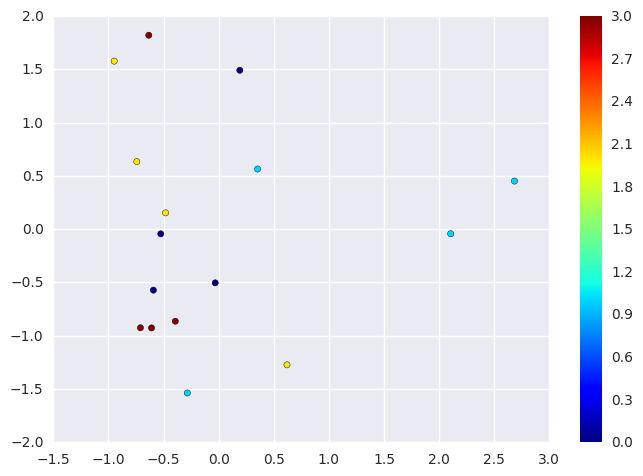

In [167]:
plt.scatter(pcs[:,0], pcs[:,1], c=sub_df['genre'].apply(lambda x: genre_encoding[x]), cmap='jet')
plt.colorbar()

In [159]:
import seaborn as sns

In [186]:
plot_df = sub_df.iloc[:,[1,3,4,5,6,7,8]]

In [187]:
plot_df

,genre,voiced_sounds,voiced_fricatives,unvoiced_fricatives,voiced_stop_consonants,unvoiced_stop_consonants,total
0,Pop,0.702073,0.044041,0.086140,0.054404,0.113342,1544.0
1,Pop,0.713661,0.036066,0.079781,0.041530,0.128962,915.0
2,Pop,0.692929,0.028283,0.071717,0.087879,0.119192,990.0
3,Pop,0.640468,0.040691,0.104794,0.045151,0.168896,1794.0
4,Country,0.723214,0.030134,0.069196,0.063616,0.113839,896.0
5,Country,0.637097,0.036866,0.127880,0.077189,0.120968,868.0
6,Country,0.710018,0.068541,0.044815,0.078207,0.098418,1138.0
7,Country,0.722861,0.033206,0.074074,0.071520,0.098340,783.0
8,Rock,0.672922,0.033512,0.052279,0.096515,0.144772,746.0
9,Rock,0.685274,0.050048,0.104909,0.062560,0.097209,1039.0


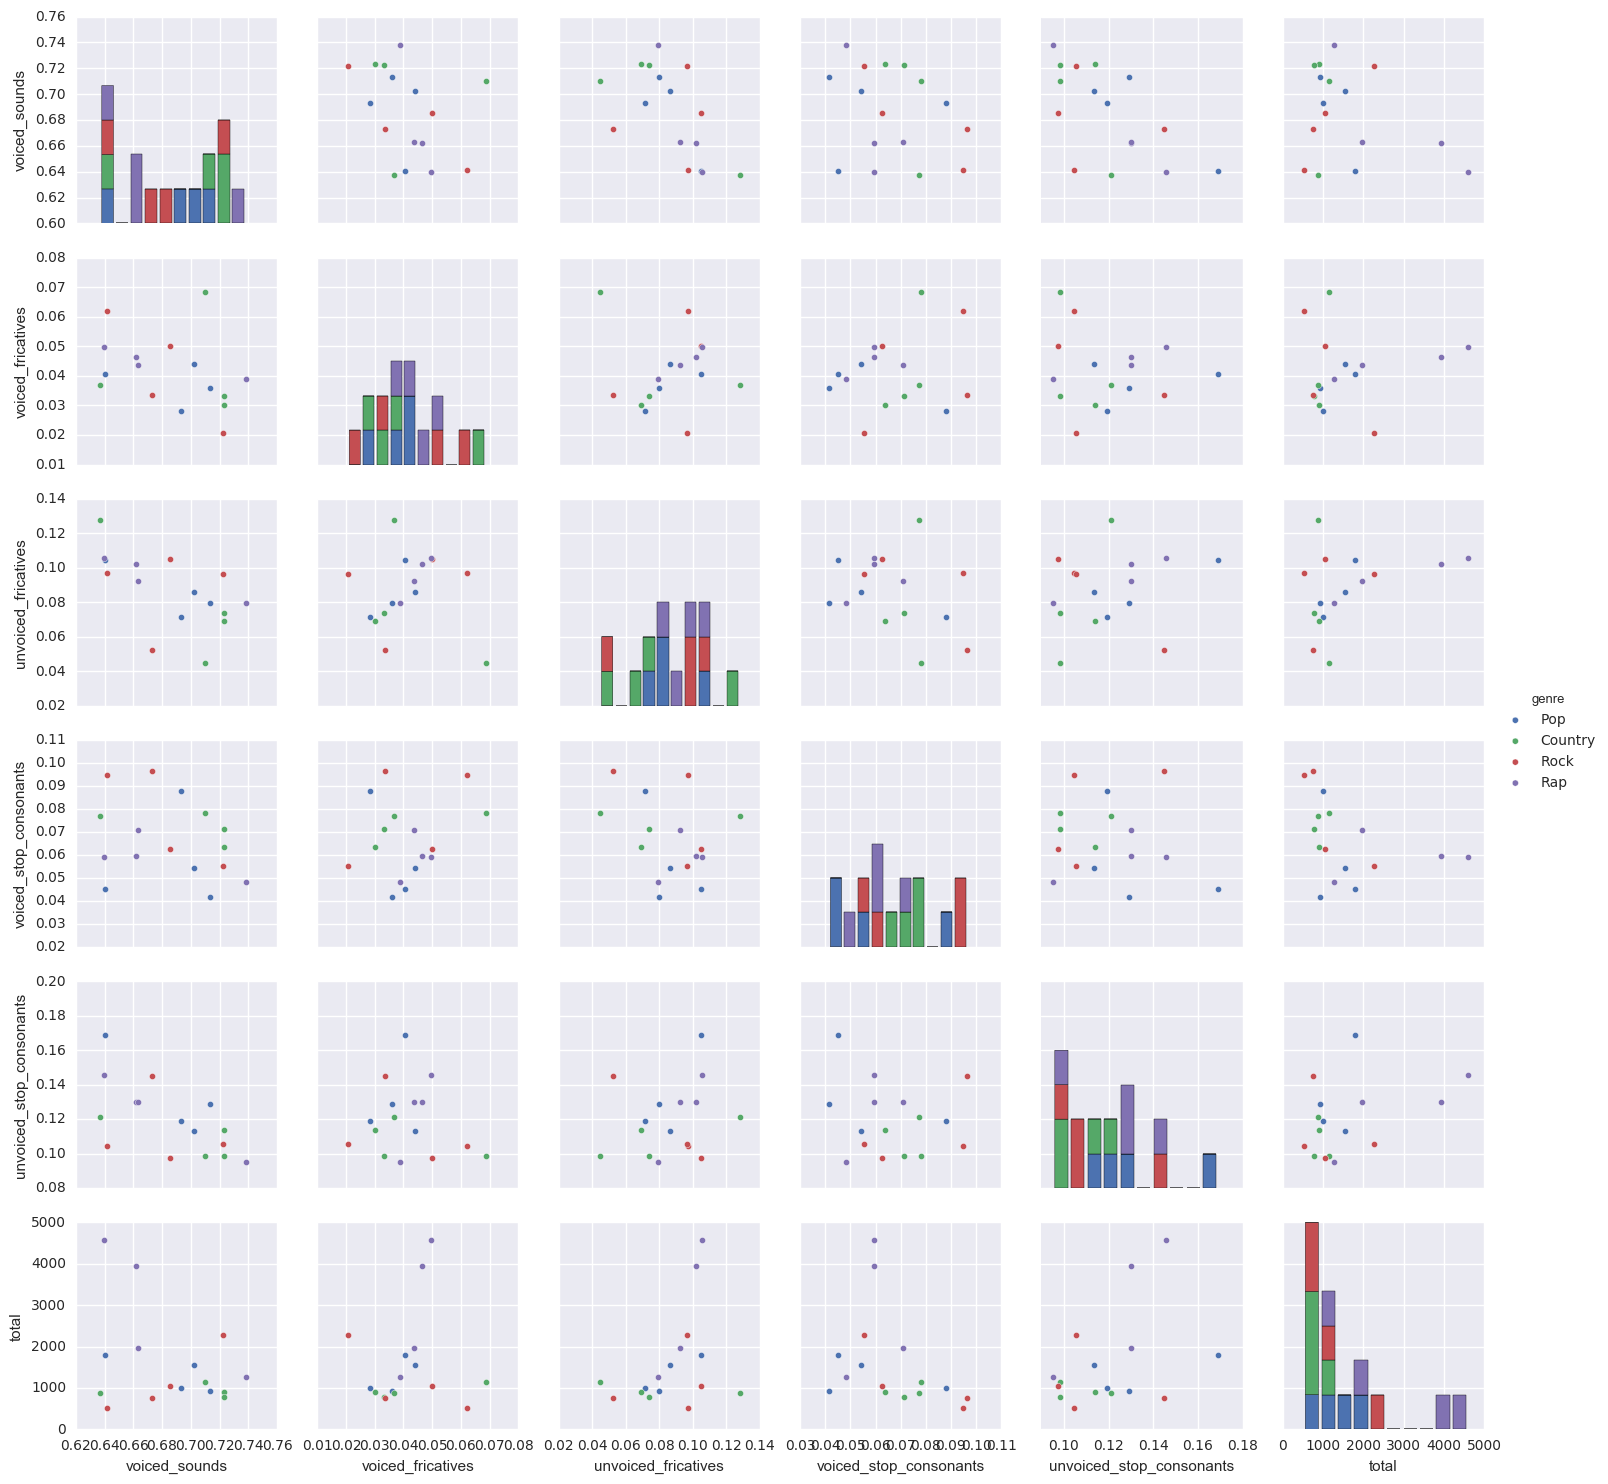

In [188]:
sns.pairplot(sub_df.iloc[:,[1,3,4,5,6,7,8]], hue='genre')